# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [ ]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

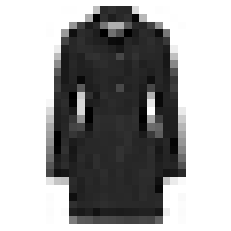

In [ ]:
plt.imshow(X_train[7], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
y_train[0]

4

In [ ]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

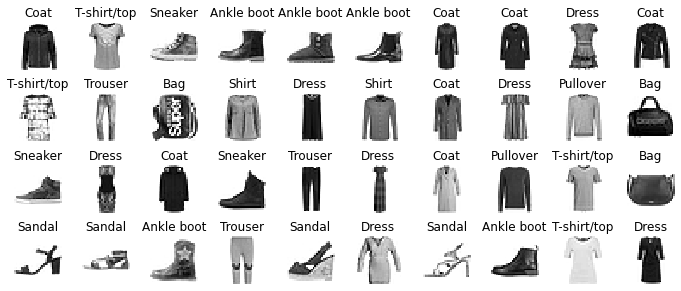

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.0444418 , -0.05718771, -0.07321101, ...,  0.02154177,
        -0.02823478,  0.00212552],
       [ 0.05688526, -0.01147513,  0.06365967, ...,  0.05967955,
        -0.01568585, -0.02539191],
       [-0.02929281,  0.07156087,  0.03398924, ...,  0.008835  ,
         0.04614034, -0.03162335],
       ...,
       [ 0.00771756, -0.0355832 , -0.06831592, ...,  0.05769552,
        -0.04302073, -0.01805275],
       [ 0.05920626,  0.0677308 ,  0.037265  , ..., -0.02594636,
         0.06056109,  0.02382039],
       [-0.01092428,  0.0716349 , -0.0631813 , ..., -0.01170833,
         0.02198671,  0.03976158]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7134 - accuracy: 0.7668 - val_loss: 0.5036 - val_accuracy: 0.8310
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4869 - accuracy: 0.8313 - val_loss: 0.4791 - val_accuracy: 0.8300
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4425 - accuracy: 0.8443 - val_loss: 0.4297 - val_accuracy: 0.8512
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4147 - accuracy: 0.8558 - val_loss: 0.4019 - val_accuracy: 0.8580
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3953 - accuracy: 0.8609 - val_loss: 0.3860 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3780 - accuracy: 0.8674 - val_loss: 0.3767 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3657 - accuracy: 0.8713 - val_loss: 0.3675 - val_accurac

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

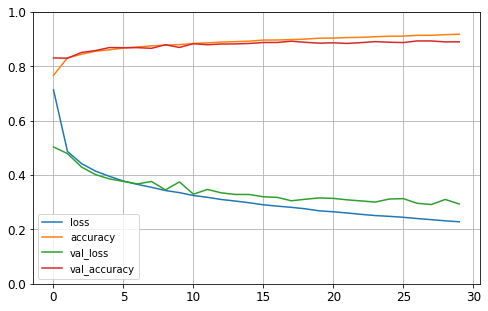

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8840


[0.3281545639038086, 0.8840000033378601]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict(X_new)
y_predx=np.argmax(y_pred,axis=1)
y_predx

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_predx]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

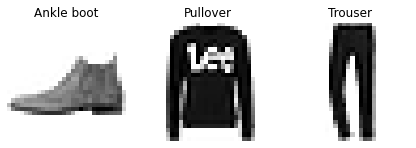

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

## 1) Plot Learning curves when using different optimizers


Learning curves using "Adam" optimizer

In [ ]:
model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history_1 = model_1.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4830 - accuracy: 0.8260 - val_loss: 0.3978 - val_accuracy: 0.8540
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3650 - accuracy: 0.8670 - val_loss: 0.3529 - val_accuracy: 0.8728
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3254 - accuracy: 0.8794 - val_loss: 0.3263 - val_accuracy: 0.8784
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3023 - accuracy: 0.8877 - val_loss: 0.3248 - val_accuracy: 0.8808
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2847 - accuracy: 0.8931 - val_loss: 0.3310 - val_accuracy: 0.8812
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2705 - accuracy: 0.8987 - val_loss: 0.3029 - val_accuracy: 0.8914
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2579 - accuracy: 0.9035 - val_loss: 0.3170 - val_accuracy:

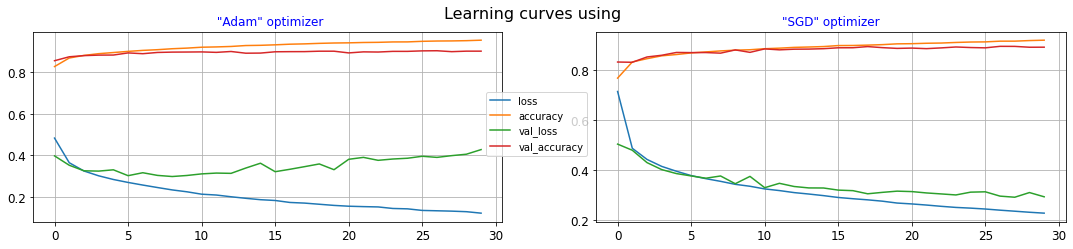

In [ ]:
import pandas as pd

data = pd.DataFrame(history.history)
data_1= pd.DataFrame(history_1.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 3.5)
f.suptitle('Learning curves using', fontsize=16)


ax1.plot(data_1)
ax1.set_title(' "Adam" optimizer', color='blue')
ax1.grid(True)

ax2.plot(data)
ax2.set_title('"SGD" optimizer', color='blue')
ax2.grid(True)
ax2.set

f.legend(data_1.columns, loc='center')
plt.show()




## 2) Plot Learning curves when using different batch size


In [ ]:
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_2 = model_2.fit(X_train, y_train, batch_size=15, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
3667/3667 [==============================] - 11s 3ms/step - loss: 0.6131 - accuracy: 0.7900 - val_loss: 0.4513 - val_accuracy: 0.8450
Epoch 2/30
3667/3667 [==============================] - 10s 3ms/step - loss: 0.4400 - accuracy: 0.8443 - val_loss: 0.4004 - val_accuracy: 0.8644
Epoch 3/30
3667/3667 [==============================] - 10s 3ms/step - loss: 0.3960 - accuracy: 0.8588 - val_loss: 0.3852 - val_accuracy: 0.8628
Epoch 4/30
3667/3667 [==============================] - 11s 3ms/step - loss: 0.3685 - accuracy: 0.8688 - val_loss: 0.3615 - val_accuracy: 0.8698
Epoch 5/30
3667/3667 [==============================] - 10s 3ms/step - loss: 0.3477 - accuracy: 0.8737 - val_loss: 0.3635 - val_accuracy: 0.8708
Epoch 6/30
3667/3667 [==============================] - 10s 3ms/step - loss: 0.3316 - accuracy: 0.8805 - val_loss: 0.3558 - val_accuracy: 0.8736
Epoch 7/30
3667/3667 [==============================] - 11s 3ms/step - loss: 0.3178 - accuracy: 0.8844 - val_loss: 0.3388 - val_ac

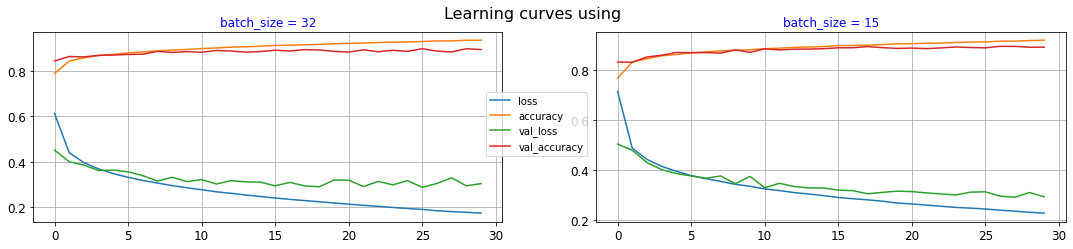

In [ ]:

data = pd.DataFrame(history.history)
data_2= pd.DataFrame(history_2.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 3.5)
f.suptitle('Learning curves using', fontsize=16)

ax1.plot(data_2)
ax1.set_title('batch_size = 32', color='blue')
ax1.grid(True)

ax2.plot(data)
ax2.set_title('batch_size = 15', color='blue')
ax2.grid(True)

f.legend(data.columns, loc='center')
plt.show()

## 3) Plot Learning curves when using different number of epochs


In [ ]:
model_3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, batch_size=32, epochs=17,
                    validation_data=(X_valid, y_valid))

Epoch 1/17
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7296 - accuracy: 0.7605 - val_loss: 0.5131 - val_accuracy: 0.8294
Epoch 2/17
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4921 - accuracy: 0.8290 - val_loss: 0.4562 - val_accuracy: 0.8484
Epoch 3/17
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4449 - accuracy: 0.8441 - val_loss: 0.4093 - val_accuracy: 0.8622
Epoch 4/17
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4176 - accuracy: 0.8535 - val_loss: 0.3996 - val_accuracy: 0.8650
Epoch 5/17
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3981 - accuracy: 0.8610 - val_loss: 0.3923 - val_accuracy: 0.8648
Epoch 6/17
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3814 - accuracy: 0.8663 - val_loss: 0.3809 - val_accuracy: 0.8728
Epoch 7/17
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3700 - accuracy: 0.8695 - val_loss: 0.3769 - val_accuracy:

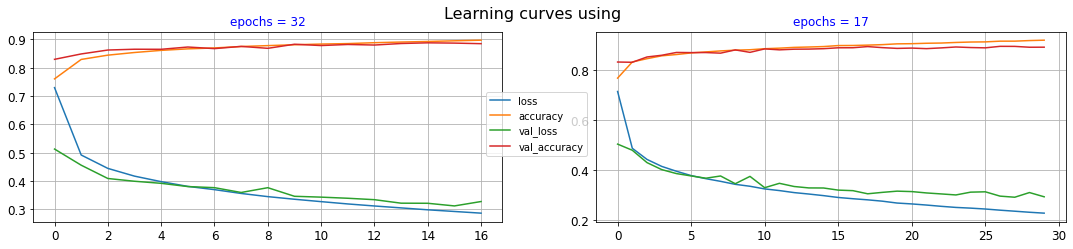

In [ ]:
data = pd.DataFrame(history.history)
data_3= pd.DataFrame(history_3.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 3.5)
f.suptitle('Learning curves using', fontsize=16)


ax1.plot(data_3)
ax1.set_title('epochs = 32', color='blue')
ax1.grid(True)

ax2.plot(data)
ax2.set_title('epochs = 17', color='blue')
ax2.grid(True)

f.legend(data.columns, loc='center')
plt.show()

## 4) Add additional neurons and use Dropout Layer. Plot Learning curves.


In [ ]:
from keras.layers import Dropout

In [ ]:
model_4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    #Add droupout on hidden layers
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model_4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_4 = model_4.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7616 - accuracy: 0.7448 - val_loss: 0.5127 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5169 - accuracy: 0.8203 - val_loss: 0.4405 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4652 - accuracy: 0.8355 - val_loss: 0.4188 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4332 - accuracy: 0.8470 - val_loss: 0.4143 - val_accuracy: 0.8528
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4100 - accuracy: 0.8545 - val_loss: 0.3847 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3912 - accuracy: 0.8603 - val_loss: 0.3708 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3786 - accuracy: 0.8657 - val_loss: 0.3561 - val_accuracy:

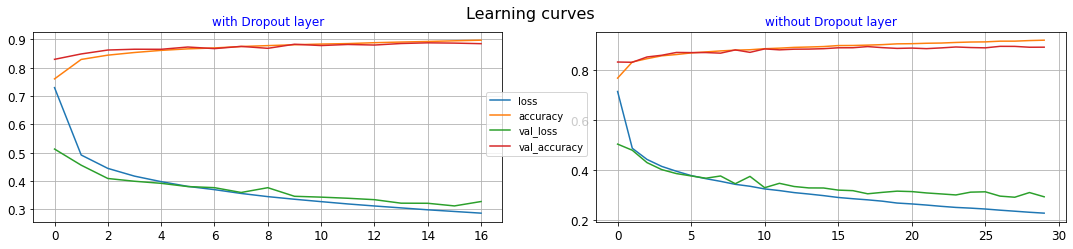

In [ ]:
data = pd.DataFrame(history.history)
data_4= pd.DataFrame(history_3.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 3.5)
f.suptitle('Learning curves ', fontsize=16)


ax1.plot(data_4)
ax1.set_title('with Dropout layer', color='blue')
ax1.grid(True)

ax2.plot(data)
ax2.set_title('without Dropout layer', color='blue')
ax2.grid(True)

f.legend(data.columns, loc='center')
plt.show()

## 5) Use Batch Normalisation


In [ ]:
model_4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    #Add BatchNormalization layers
    keras.layers.BatchNormalization(input_shape=(2,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model_4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_4 = model_4.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5216 - accuracy: 0.8181 - val_loss: 0.3998 - val_accuracy: 0.8578
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3873 - accuracy: 0.8617 - val_loss: 0.3761 - val_accuracy: 0.8652
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3510 - accuracy: 0.8731 - val_loss: 0.3426 - val_accuracy: 0.8748
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3291 - accuracy: 0.8792 - val_loss: 0.3388 - val_accuracy: 0.8790
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3091 - accuracy: 0.8860 - val_loss: 0.3202 - val_accuracy: 0.8846
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2936 - accuracy: 0.8919 - val_loss: 0.3334 - val_accuracy: 0.8754
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2808 - accuracy: 0.8974 - val_loss: 0.3251 - val_accuracy:

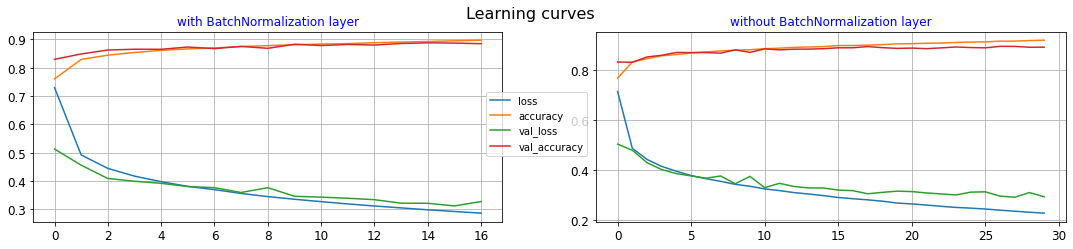

In [ ]:
data = pd.DataFrame(history.history)
data_4= pd.DataFrame(history_3.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 3.5)
f.suptitle('Learning curves ', fontsize=16)


ax1.plot(data_4)
ax1.set_title('with BatchNormalization layer', color='blue')
ax1.grid(True)

ax2.plot(data)
ax2.set_title('without BatchNormalization layer', color='blue')
ax2.grid(True)

f.legend(data.columns, loc='center')
plt.show()

7) apply on different datasets